In [1]:
from torchmetrics.functional import structural_similarity_index_measure
from torchmetrics.image import PeakSignalNoiseRatio
from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity
import re 
import json 
import os
from PIL import Image, ImageDraw, ImageFont
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt 

types = ['benchmark', 'every', 'gamma', 'noise-std', 'orientation', 'blue-noise', 'green-noise', 'red-noise', 'pos-orient', 'position', 'range', 'saturation']
types_dict_ngp_on = {type: {} for type in types}
types_dict_ngp_off = {type: {} for type in types}
types_dict_nerfacto_on = {type: {} for type in types}
types_dict_nerfacto_off = {type: {} for type in types}


path_stump_ngp_on = r'C:\Stuff\Results\metrics\stump_ngp_opt_on_metrics.npy'
path_stump_ngp_off = r'C:\Stuff\Results\metrics\stump_ngp_opt_off_metrics.npy'
path_stump_nerfacto_on = r'C:\Stuff\Results\metrics\nerfacto_stump_opt_on_metrics.npy'
path_stump_nerfacto_off = r'C:\Stuff\Results\metrics\nerfacto_stump_opt_off_metrics.npy'

ngp_on = np.load(path_stump_ngp_on, allow_pickle=True).item()
ngp_off = np.load(path_stump_ngp_off, allow_pickle=True).item()
nerfacto_on = np.load(path_stump_nerfacto_on, allow_pickle=True).item()
nerfacto_off = np.load(path_stump_nerfacto_off, allow_pickle=True).item()

for k,v in ngp_on.items():
    for type in types:
        if type in k:
            types_dict_ngp_on[type][k] = v

for k,v in ngp_off.items():
    for type in types:
        if type in k:
            types_dict_ngp_off[type][k] = v

for k,v in nerfacto_on.items():
    if 'stump-orient-std' in k:
        k = k.replace('stump-orient-std', 'stump-orientation-std')
    elif 'stump-pos-std' in k:
        k = k.replace('stump-pos-std', 'stump-position-std')
    for type in types:
        if type in k:
            types_dict_nerfacto_on[type][k] = v

for k,v in nerfacto_off.items():
    for type in types:
        if type in k:
            types_dict_nerfacto_off[type][k] = v                                

benchmark_psnr_ngp_on = types_dict_ngp_on['benchmark']['stump-benchmark']['PSNR']
benchmark_ssim_ngp_on = types_dict_ngp_on['benchmark']['stump-benchmark']['SSIM']
benchmark_lpips_ngp_on = types_dict_ngp_on['benchmark']['stump-benchmark']['LPIPS']

benchmark_psnr_ngp_off = types_dict_ngp_off['benchmark']['stump-benchmark']['PSNR']
benchmark_ssim_ngp_off = types_dict_ngp_off['benchmark']['stump-benchmark']['SSIM']
benchmark_lpips_ngp_off = types_dict_ngp_off['benchmark']['stump-benchmark']['LPIPS']

benchmark_psnr_nerfacto_on = types_dict_nerfacto_on['benchmark']['nerfacto_stump_opt_on_benchmark']['PSNR']
benchmark_ssim_nerfacto_on = types_dict_nerfacto_on['benchmark']['nerfacto_stump_opt_on_benchmark']['SSIM']
benchmark_lpips_nerfacto_on = types_dict_nerfacto_on['benchmark']['nerfacto_stump_opt_on_benchmark']['LPIPS']

benchmark_psnr_nerfacto_off = types_dict_nerfacto_off['benchmark']['nerfacto_stump_opt_off_benchmark']['PSNR']
benchmark_ssim_nerfacto_off = types_dict_nerfacto_off['benchmark']['nerfacto_stump_opt_off_benchmark']['SSIM']
benchmark_lpips_nerfacto_off = types_dict_nerfacto_off['benchmark']['nerfacto_stump_opt_off_benchmark']['LPIPS']

benchmarks_psnr = [benchmark_psnr_ngp_on, benchmark_psnr_ngp_off, benchmark_psnr_nerfacto_on, benchmark_psnr_nerfacto_off]
benchmarks_ssim = [benchmark_ssim_ngp_on, benchmark_ssim_ngp_off, benchmark_ssim_nerfacto_on, benchmark_ssim_nerfacto_off]
benchmarks_lpips = [benchmark_lpips_ngp_on, benchmark_lpips_ngp_off, benchmark_lpips_nerfacto_on, benchmark_lpips_nerfacto_off]


In [2]:
psnr_heatmap_dict_ngp_on = {}
psnr_heatmap_dict_ngp_off = {}
psnr_heatmap_dict_nerfacto_on = {}
psnr_heatmap_dict_nerfacto_off = {}

ssim_heatmap_dict_ngp_on = {}
ssim_heatmap_dict_ngp_off = {}
ssim_heatmap_dict_nerfacto_on = {}
ssim_heatmap_dict_nerfacto_off = {}

lpips_heatmap_dict_ngp_on = {}
lpips_heatmap_dict_ngp_off = {}
lpips_heatmap_dict_nerfacto_on = {}
lpips_heatmap_dict_nerfacto_off = {}

for type, metrics in types_dict_ngp_on.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'

    mean_last_psnr = np.mean(sorted_psnrs[-1])
    mean_last_ssim = np.mean(sorted_ssims[-1])
    mean_last_lpips = np.mean(sorted_lpips[-1])

    mean_benchmark_psnr = np.mean(benchmark_psnr_ngp_on)
    mean_benchmark_ssim = np.mean(benchmark_ssim_ngp_on)
    mean_benchmark_lpips = np.mean(benchmark_lpips_ngp_on)

    diff_psnr = mean_benchmark_psnr - mean_last_psnr
    diff_ssim = mean_benchmark_ssim - mean_last_ssim
    diff_lpips = mean_benchmark_lpips - mean_last_lpips

    rel_change_psnr = diff_psnr / mean_benchmark_psnr * 100
    rel_change_ssim = diff_ssim / mean_benchmark_ssim * 100
    rel_change_lpips = diff_lpips / mean_benchmark_lpips * -100

    psnr_heatmap_dict_ngp_on[type] = rel_change_psnr
    ssim_heatmap_dict_ngp_on[type] = rel_change_ssim
    lpips_heatmap_dict_ngp_on[type] = rel_change_lpips


for type, metrics in types_dict_ngp_off.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'

    mean_last_psnr = np.mean(sorted_psnrs[-1])
    mean_last_ssim = np.mean(sorted_ssims[-1])
    mean_last_lpips = np.mean(sorted_lpips[-1])

    mean_benchmark_psnr = np.mean(benchmark_psnr_ngp_off)
    mean_benchmark_ssim = np.mean(benchmark_ssim_ngp_off)
    mean_benchmark_lpips = np.mean(benchmark_lpips_ngp_off)

    diff_psnr = mean_benchmark_psnr - mean_last_psnr
    diff_ssim = mean_benchmark_ssim - mean_last_ssim
    diff_lpips = mean_benchmark_lpips - mean_last_lpips

    rel_change_psnr = diff_psnr / mean_benchmark_psnr * 100
    rel_change_ssim = diff_ssim / mean_benchmark_ssim * 100
    rel_change_lpips = diff_lpips / mean_benchmark_lpips * -100

    psnr_heatmap_dict_ngp_off[type] = rel_change_psnr
    ssim_heatmap_dict_ngp_off[type] = rel_change_ssim
    lpips_heatmap_dict_ngp_off[type] = rel_change_lpips

for type, metrics in types_dict_nerfacto_on.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'

    mean_last_psnr = np.mean(sorted_psnrs[-1])
    mean_last_ssim = np.mean(sorted_ssims[-1])
    mean_last_lpips = np.mean(sorted_lpips[-1])

    mean_benchmark_psnr = np.mean(benchmark_psnr_nerfacto_on)
    mean_benchmark_ssim = np.mean(benchmark_ssim_nerfacto_on)
    mean_benchmark_lpips = np.mean(benchmark_lpips_nerfacto_on)

    diff_psnr = mean_benchmark_psnr - mean_last_psnr
    diff_ssim = mean_benchmark_ssim - mean_last_ssim
    diff_lpips = mean_benchmark_lpips - mean_last_lpips

    rel_change_psnr = diff_psnr / mean_benchmark_psnr * 100
    rel_change_ssim = diff_ssim / mean_benchmark_ssim * 100
    rel_change_lpips = diff_lpips / mean_benchmark_lpips * -100

    psnr_heatmap_dict_nerfacto_on[type] = rel_change_psnr
    ssim_heatmap_dict_nerfacto_on[type] = rel_change_ssim
    lpips_heatmap_dict_nerfacto_on[type] = rel_change_lpips 

for type, metrics in types_dict_nerfacto_off.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'

    mean_last_psnr = np.mean(sorted_psnrs[-1])
    mean_last_ssim = np.mean(sorted_ssims[-1])
    mean_last_lpips = np.mean(sorted_lpips[-1])

    mean_benchmark_psnr = np.mean(benchmark_psnr_nerfacto_off)
    mean_benchmark_ssim = np.mean(benchmark_ssim_nerfacto_off)
    mean_benchmark_lpips = np.mean(benchmark_lpips_nerfacto_off)

    diff_psnr = mean_benchmark_psnr - mean_last_psnr
    diff_ssim = mean_benchmark_ssim - mean_last_ssim
    diff_lpips = mean_benchmark_lpips - mean_last_lpips

    rel_change_psnr = diff_psnr / mean_benchmark_psnr * 100
    rel_change_ssim = diff_ssim / mean_benchmark_ssim * 100
    rel_change_lpips = diff_lpips / mean_benchmark_lpips * -100

    psnr_heatmap_dict_nerfacto_off[type] = rel_change_psnr
    ssim_heatmap_dict_nerfacto_off[type] = rel_change_ssim
    lpips_heatmap_dict_nerfacto_off[type] = rel_change_lpips  

In [3]:
benchmark = 'Original'
red_pns = 'Red channel PnS Noise'
blue_pns = 'Blue channel PnS Noise'
green_pns = 'Green channel PnS Noise'
noise= 'Image Noise'
rot_noise = 'Pose Noise Rotation'
trans_noise = 'Pose Noise Translation'
combined_noise = 'Pose Noise Combined'
satur = 'Saturation Change'
gamma = 'Gamma Correction'
sparce = 'Reduced Image Set'
height = 'Height Rduction'

labels = (combined_noise, rot_noise, sparce, height, noise, gamma, trans_noise, red_pns, green_pns, blue_pns, satur, benchmark)

In [4]:
# appearnace = {}
# appearnace['gamma'] = psnr_heatmap_dict_nerfacto_on['gamma']
# appearnace['saturation'] = psnr_heatmap_dict_nerfacto_on['saturation']

# noises = {}
# noises['noise-std'] = psnr_heatmap_dict_nerfacto_on['noise-std']
# noises['blue-noise'] = psnr_heatmap_dict_nerfacto_on['blue-noise']
# noises['red-noise'] = psnr_heatmap_dict_nerfacto_on['red-noise']
# noises['green-noise'] = psnr_heatmap_dict_nerfacto_on['green-noise']

# pose_noises = {}
# pose_noises['position'] = psnr_heatmap_dict_nerfacto_on['position']
# pose_noises['orientation'] = psnr_heatmap_dict_nerfacto_on['orientation']
# pose_noises['pos-orient'] = psnr_heatmap_dict_nerfacto_on['pos-orient']

# reductions = {}
# reductions['range'] = psnr_heatmap_dict_nerfacto_on['range']
# reductions['every'] = psnr_heatmap_dict_nerfacto_on['every']


In [5]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# import os

# keys = {0: ['Gamma', 'Saturation'],
#         1: ['Noise', 'PnS Blue', 'PnS Red', 'PnS Green'],
#         2: ['Position Noise', 'Orientation Noise', 'Combined Noise'],
#         3: ['Height', 'Reduced']}

# def plot_adjusted_heatmaps(dict_clusters, cluster_names):
#     fig, axs = plt.subplots(1, len(dict_clusters), gridspec_kw={'width_ratios': [len(cluster) for cluster in dict_clusters]}, figsize=(15, 2.5))  # Adjust figsize as needed

#     for i, (ax, cluster_dict, name) in enumerate(zip(axs, dict_clusters, cluster_names)):
#         # Converting each dict to a 2D array of 1 row
#         data = np.array(list(cluster_dict.values())).reshape(1, -1)
#         print(cluster_dict.keys())
#         sns.heatmap(data, ax=ax, annot=True, cmap="Reds", cbar=False, vmin=0, vmax=40, fmt=".2f", annot_kws={"size": 15})  # Adjust 'size' as needed
#         ax.set_xticklabels(keys[i])  # Adjust rotation for better visibility
#         ax.set_yticks([])  # Disabling y-ticks

#         ax.set_title(name, pad=20)  # Adding cluster name as title, adjust pad for spacing

#     # Adjust layout to make sure titles and labels are visible
#     plt.tight_layout()

#     # Adding a shared colorbar
#     sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=40))
#     plt.colorbar(sm, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)

#     save_dir = r'C:\Stuff\Results\plots'
#     plt.savefig(os.path.join(save_dir, 'heatmap_one_row_stump_nerfacto_on.pdf'), format='pdf', dpi=300, bbox_inches='tight')  # Add bbox_inches='tight' to ensure all content fits

#     plt.show()

# # Example usage (ensure your cluster dictionaries are correctly defined before calling)
# plot_adjusted_heatmaps([appearnace, noises, pose_noises, reductions], ["Lightning Changes", "Image Noise", "Pose Noise", "Reductions"])


In [4]:
label_map = {
    'noise-std': 'Image Noise',
    'blue-noise': 'Blue channel PnS Noise',
    'red-noise': 'Red channel PnS Noise',
    'green-noise': 'Green channel PnS Noise',
    'position': 'Pose Noise Translation',
    'orientation': 'Pose Noise Rotation',
    'pos-orient': 'Pose Noise Combined',
    'saturation': 'Saturation Change',
    'gamma': 'Gamma Correction',
    'range': 'Reduced Image Set',
    'every': 'Height Reduction'
}

C:\Users\danko\AppData\Local\Temp\ipykernel_1936\2435225846.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


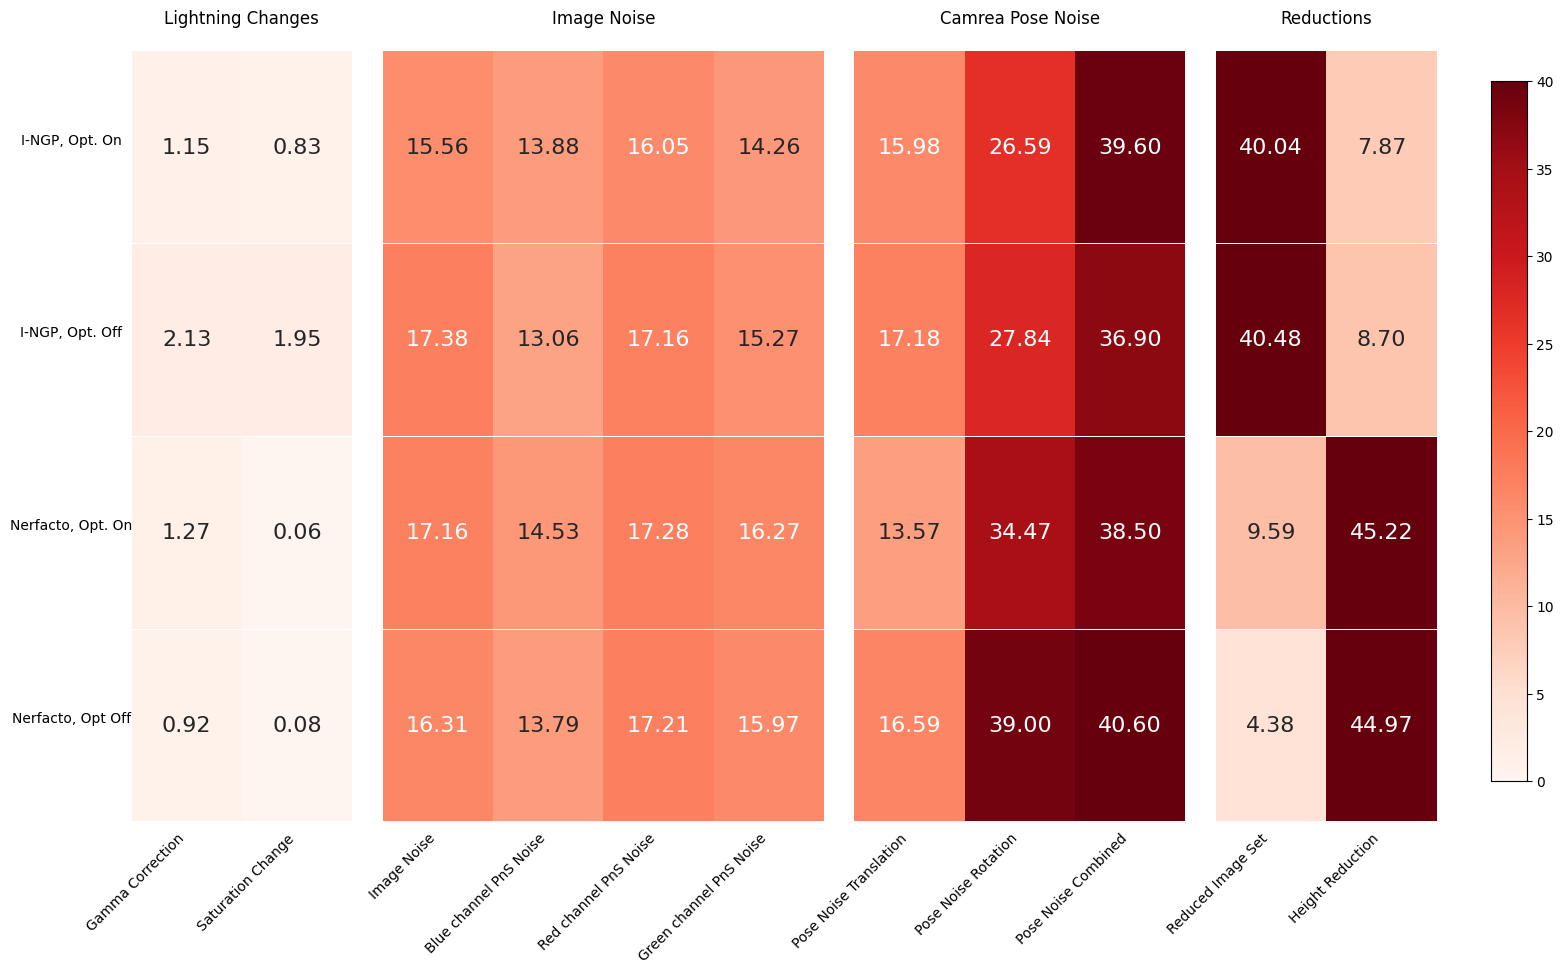

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define clusters to match the keys used in the models dictionary
clusters = {
    "Lightning Changes": ["gamma", "saturation"],
    "Image Noise": ["noise-std", "blue-noise", "red-noise", "green-noise"],
    "Camrea Pose Noise": ["position", "orientation", "pos-orient"],
    "Reductions": ["range", "every"]
}

models = [psnr_heatmap_dict_ngp_on, psnr_heatmap_dict_ngp_off, psnr_heatmap_dict_nerfacto_on, psnr_heatmap_dict_nerfacto_off]
keys = ['gamma', 'saturation', 'noise-std', 'blue-noise', 'red-noise', 'green-noise', 'position', 'orientation','pos-orient', 'range', 'every']

# Update models with structured data according to clusters
models = {
    "I-NGP, Opt. On": {k: models[0][k] for k in keys},
    "I-NGP, Opt. Off": {k: models[1][k] for k in keys},
    "Nerfacto, Opt. On": {k: models[2][k] for k in keys},
    "Nerfacto, Opt Off": {k: models[3][k] for k in keys}
}

def plot_adjusted_heatmaps_no_overlap(models, clusters, label_map):
    # Set up the figure with a subplot for each cluster per model, ensuring axs is always 2D
    fig, axs = plt.subplots(len(models), len(clusters), figsize=(18, 10), gridspec_kw={'width_ratios': [len(v) for v in clusters.values()], 'wspace': 0.1, 'hspace': 0.005}, squeeze=False)

    # Plot the heatmaps
    for i, (model_name, model_scores) in enumerate(models.items()):
        for j, (cluster_name, degradation_types) in enumerate(clusters.items()):
            ax = axs[i, j]
            # Extract the specific values from the model dictionary for the current cluster
            data = [model_scores[dt] for dt in degradation_types]
            sns.heatmap(np.array(data).reshape(1, -1), ax=ax, annot=True, cmap="Reds", cbar=False, vmin=0, vmax=40, fmt=".2f",
                        annot_kws={"size": 16})
            # Label degradation types with new names, only on the last row
            if i == len(models) - 1:
                new_labels = [label_map.get(dt, dt) for dt in degradation_types]
                ax.set_xticklabels(new_labels, rotation=45, ha="right", fontsize=10)
            else:
                ax.set_xticklabels([])
            if j == 0:
                ax.set_ylabel(model_name, rotation=0, labelpad=40, fontsize = 10)
            if i == 0:
                ax.set_title(cluster_name, pad=20, fontsize = 12)
            ax.set_yticks([])
            ax.xaxis.set_ticks_position('none')

            # Visual separation between clusters
            if j < len(clusters) - 1:
                plt.setp(ax.spines['right'], visible=False)
            if j > 0:
                plt.setp(ax.spines['left'], visible=False)

    # Create an empty space on the right side of the heatmaps for the colorbar
    fig.subplots_adjust(right=0.85)

    # Shared colorbar on the right, adjusted to not overlap
    sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=40))
    cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])  # Adjust these values to position the colorbar
    fig.colorbar(sm, cax=cbar_ax, orientation='vertical')
    save_dir = r'C:\Stuff\Results\plots\heatmaps_clustered'
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f'heatmap_stump_psnr_clustered.pdf'), format='pdf', dpi=300)


    plt.show()

# Call the plotting function with the adjusted layout and new labels
plot_adjusted_heatmaps_no_overlap(models, clusters, label_map)

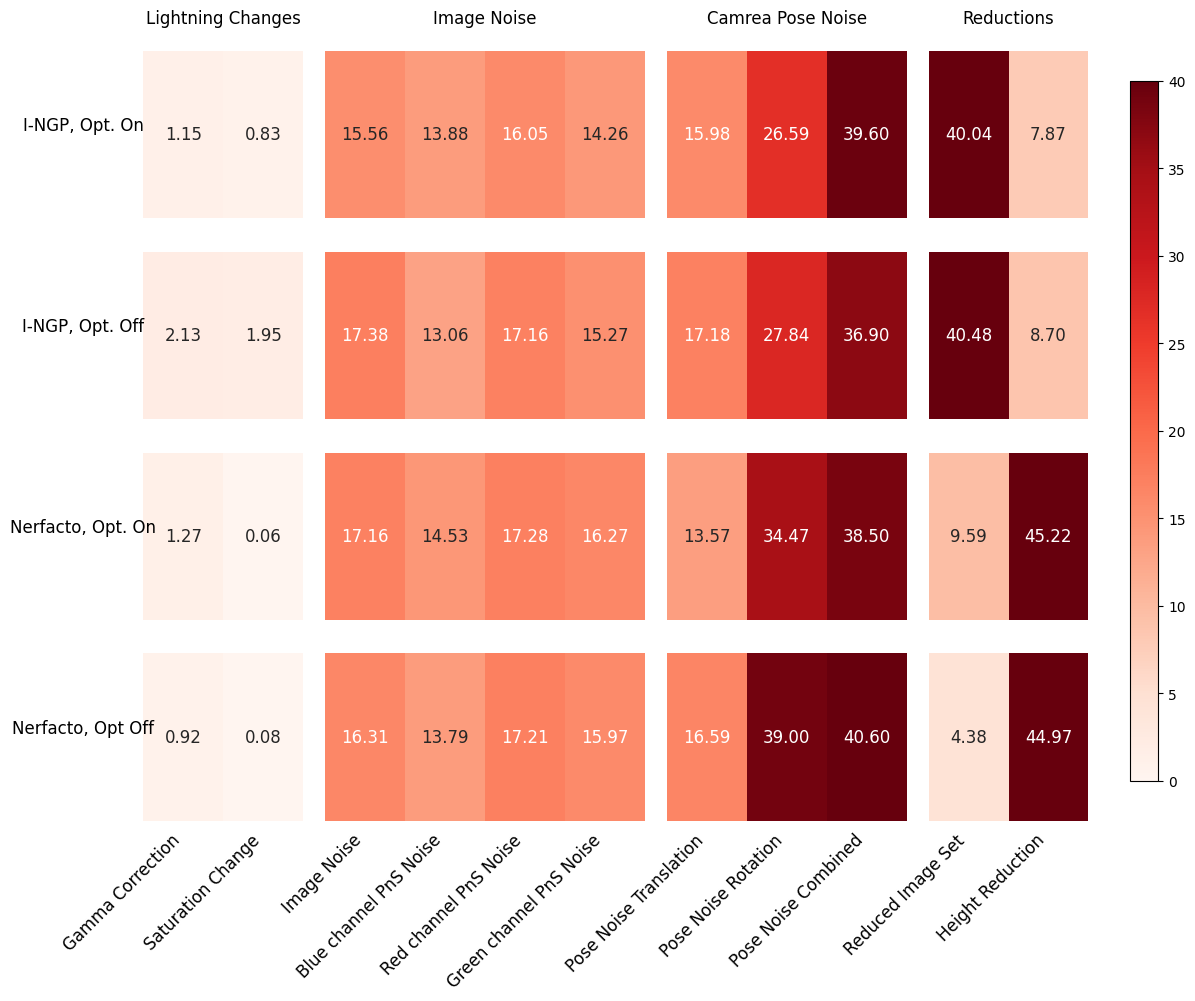

In [11]:
def plot_adjusted_heatmaps_no_overlap(models, clusters, label_map):
    # Set up the figure with a subplot for each cluster per model, ensuring axs is always 2D
    # Adjust the figsize to make the cells smaller
    fig, axs = plt.subplots(len(models), len(clusters), figsize=(14, 10), gridspec_kw={'width_ratios': [len(v) for v in clusters.values()], 'wspace': 0.1, 'hspace': 0.2}, squeeze=False)

    # Plot the heatmaps
    for i, (model_name, model_scores) in enumerate(models.items()):
        for j, (cluster_name, degradation_types) in enumerate(clusters.items()):
            ax = axs[i, j]
            # Extract the specific values from the model dictionary for the current cluster
            data = [model_scores[dt] for dt in degradation_types]
            # Increase the fontsize for annotations
            sns.heatmap(np.array(data).reshape(1, -1), ax=ax, annot=True, cmap="Reds", cbar=False, vmin=0, vmax=40, fmt=".2f",
                        annot_kws={"size": 12})
            # Label degradation types with new names, only on the last row
            if i == len(models) - 1:
                new_labels = [label_map.get(dt, dt) for dt in degradation_types]
                ax.set_xticklabels(new_labels, rotation=45, ha="right", fontsize=12)
            else:
                ax.set_xticklabels([])
            if j == 0:
                ax.set_ylabel(model_name, rotation=0, labelpad=40, fontsize=12)
            if i == 0:
                ax.set_title(cluster_name, pad=20, fontsize=12)
            ax.set_yticks([])
            ax.xaxis.set_ticks_position('none')

            # Visual separation between clusters
            if j < len(clusters) - 1:
                plt.setp(ax.spines['right'], visible=False)
            if j > 0:
                plt.setp(ax.spines['left'], visible=False)

    # Create an empty space on the right side of the heatmaps for the colorbar
    fig.subplots_adjust(right=0.8)

    # Shared colorbar on the right, adjusted to not overlap
    sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=40))
    cbar_ax = fig.add_axes([0.83, 0.15, 0.02, 0.7])  # Adjust these values to position the colorbar
    fig.colorbar(sm, cax=cbar_ax, orientation='vertical')

    plt.show()

# Call the plotting function with the adjusted layout and new labels
plot_adjusted_heatmaps_no_overlap(models, clusters, label_map)

[[12.19763942 12.19763942]]
[[2.22575776 2.22575776 2.22575776 2.22575776]]
[[32.44967998 32.44967998 32.44967998]]
[[25.52867545 25.52867545]]
[[37.656784 37.656784]]
[[37.70945071 37.70945071 37.70945071 37.70945071]]
[[22.48538959 22.48538959 22.48538959]]
[[25.40728698 25.40728698]]
[[2.27624426 2.27624426]]
[[32.41517526 32.41517526 32.41517526 32.41517526]]
[[15.89469316 15.89469316 15.89469316]]
[[22.98477762 22.98477762]]
[[31.69138584 31.69138584]]
[[23.83843591 23.83843591 23.83843591 23.83843591]]
[[39.05845057 39.05845057 39.05845057]]
[[11.86775601 11.86775601]]


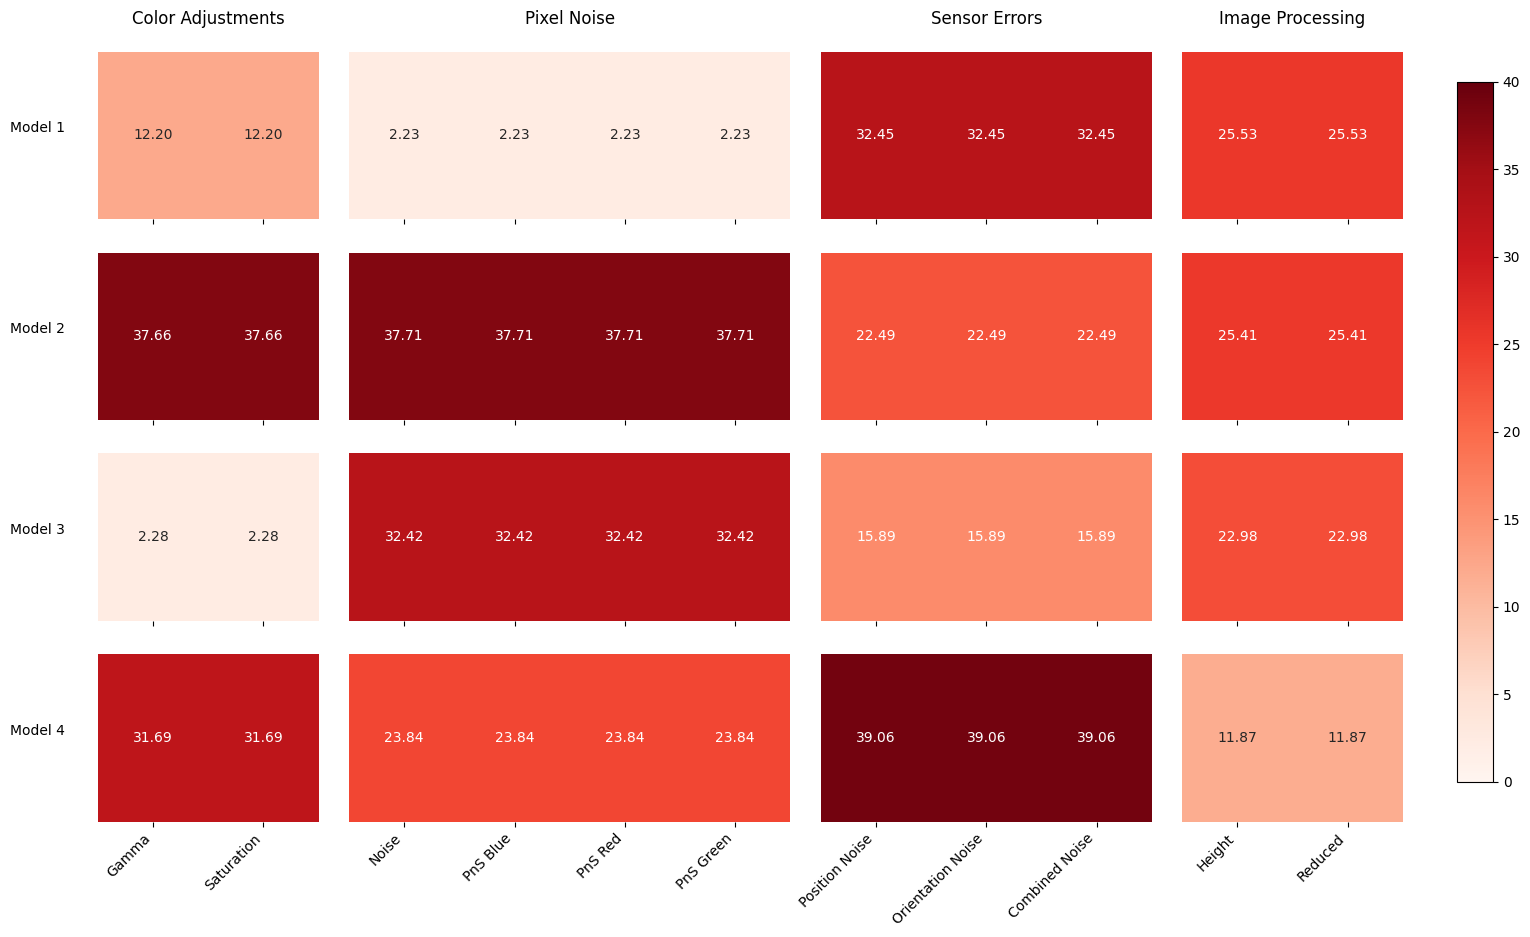

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

clusters = {
    "Color Adjustments": ["Gamma", "Saturation"],
    "Pixel Noise": ["Noise", "PnS Blue", "PnS Red", "PnS Green"],
    "Sensor Errors": ["Position Noise", "Orientation Noise", "Combined Noise"],
    "Image Processing": ["Height", "Reduced"]
}

# Update models with structured data according to clusters
models = {
    "Model 1": {k: np.random.uniform(0, 40) for k in clusters.keys()},
    "Model 2": {k: np.random.uniform(0, 40) for k in clusters.keys()},
    "Model 3": {k: np.random.uniform(0, 40) for k in clusters.keys()},
    "Model 4": {k: np.random.uniform(0, 40) for k in clusters.keys()}
}

def plot_adjusted_heatmaps_no_overlap(models, clusters):
    # Set up the figure with a subplot for each cluster per model
    fig, axs = plt.subplots(len(models), len(clusters), figsize=(18, 10), gridspec_kw={'width_ratios': [len(v) for v in clusters.values()], 'wspace': 0.1})

    # Plot the heatmaps
    for i, (model_name, model_scores) in enumerate(models.items()):
        for j, (cluster_name, degradation_types) in enumerate(clusters.items()):
            ax = axs[i, j]
            # Simulate the score for all degradations in the cluster
            data = [model_scores[cluster_name]] * len(degradation_types)
            print(np.array(data).reshape(1, -1))
            sns.heatmap(np.array(data).reshape(1, -1), ax=ax, annot=True, cmap="Reds", cbar=False, vmin=0, vmax=40, fmt=".2f",
                        annot_kws={"size": 10})
            # Label degradation types only on the last row
            if i == len(models) - 1:
                ax.set_xticklabels(degradation_types, rotation=45, ha="right")
            else:
                ax.set_xticklabels([])
            if j == 0:
                ax.set_ylabel(model_name, rotation=0, labelpad=40)
            if i == 0:
                ax.set_title(cluster_name, pad=20)
            ax.set_yticks([])

            # Visual separation between clusters
            if j < len(clusters) - 1:
                plt.setp(ax.spines['right'], visible=False)
            if j > 0:
                plt.setp(ax.spines['left'], visible=False)

    # Create an empty space on the right side of the heatmaps for the colorbar
    fig.subplots_adjust(right=0.85)

    # Shared colorbar on the right, adjusted to not overlap
    sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=40))
    cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])  # Adjust these values to position the colorbar
    fig.colorbar(sm, cax=cbar_ax, orientation='vertical')

    plt.show()

# Call the plotting function with the adjusted layout
plot_adjusted_heatmaps_no_overlap(models, clusters)
